# Arsal Ali

## Credit Card Spend Analysis & Forecasting

### Importing Basic Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

print("Path to dataset files:", path)

c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\arsal\.cache\kagglehub\datasets\priyamchoksi\credit-card-transactions-dataset\versions\1


### Converting it into DataFrame

In [3]:
df = pd.read_csv('CCT.csv')
df.head()

,0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


### Exploring and Cleaning the Dataset

In [4]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['Customer_ID'] = df.groupby(['first', 'last', 'job']).ngroup()
df.drop(columns=['first', 'last', 'job' , '0', 'dob', 'street', 'state', 
                 'zip', 'lat', 'long', 'unix_time', 'merch_lat',
                 'merch_long', 'merch_zipcode', 'gender'], inplace = True)

df.to_csv("cleaned_data.csv", index=False)

df

,trans_date_trans_time,cc_num,merchant,category,amt,city,city_pop,trans_num,is_fraud,Customer_ID
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,3495,0b242abb623afc578575680df30655b9,0,419
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,149,1f76529f8574734946361c461b024d99,0,878
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Malad City,4154,a1a22d70485983eac12b5b88dad1cf95,0,301
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,1939,6b849c168bdad6f867558c3793159a81,0,439
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Doe Hill,99,a41d7549acf90789359a9aa5346dcb46,0,944
...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Hatch,258,440b587732da4dc1a6395aba5fb41669,0,316
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Tuscarora,100,278000d2e0d2277d1de2f890067dcc0a,0,417
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,High Rolls Mountain Park,899,483f52fe67fabef353d552c1e662974c,0,184
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Manderson,1126,d667cdcbadaaed3da3f4020e83591c83,0,496


In [5]:
df.shape

(1296675, 10)

In [6]:
df.isnull().sum() # Limits the need to seperatly display columns

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
city                     0
city_pop                 0
trans_num                0
is_fraud                 0
Customer_ID              0
dtype: int64

In [7]:
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
city                         894
city_pop                     879
trans_num                1296675
is_fraud                       2
Customer_ID                  983
dtype: int64

In [8]:
print(f'Mean: {df['amt'].mean():.2f}')
print(f'Median: {df['amt'].median():.2f}')

Mean: 70.35
Median: 47.52


In [9]:
print(f'Most repeated Category: {df['category'].mode()}')

Most repeated Category: 0    gas_transport
Name: category, dtype: object


In [10]:
print(f'Most repeated City: {df['city'].mode()}')

Most repeated City: 0    Birmingham
Name: city, dtype: object


In [11]:
print(df['trans_date_trans_time'].mode())

0   2019-04-22 16:02:01
1   2020-06-01 01:37:47
2   2020-06-02 12:47:07
Name: trans_date_trans_time, dtype: datetime64[ns]


In [12]:
print(f'Most repeated Type {df['is_fraud'].mode()}')

Most repeated Type 0    0
Name: is_fraud, dtype: int64


In [13]:
print(f'Most repeated Store: {df['merchant'].mode()}')

Most repeated Store: 0    fraud_Kilback LLC
Name: merchant, dtype: object


In [14]:
print(f'Most repeated customer: {df['Customer_ID'].mode()}')

Most repeated customer: 0     86
1    719
Name: Customer_ID, dtype: int64


## EDA Starts

## Beginner EDA Questions

### 4.1.1 What are the top spending categories by transaction volume and amount?

In [15]:
df.groupby('category')['amt'].sum().sort_values(ascending=False)

category
grocery_pos       14460822.38
shopping_pos       9307993.61
shopping_net       8625149.68
gas_transport      8351732.29
home               7173928.11
kids_pets          6503680.16
entertainment      6036678.56
misc_net           5117709.26
misc_pos           5009582.50
food_dining        4672459.44
health_fitness     4653108.02
travel             4516721.68
personal_care      4353450.53
grocery_net        2439412.68
Name: amt, dtype: float64

### 4.1.2 How does spending vary over time (daily, weekly, monthly trends)?

<Axes: xlabel='trans_date_trans_time'>

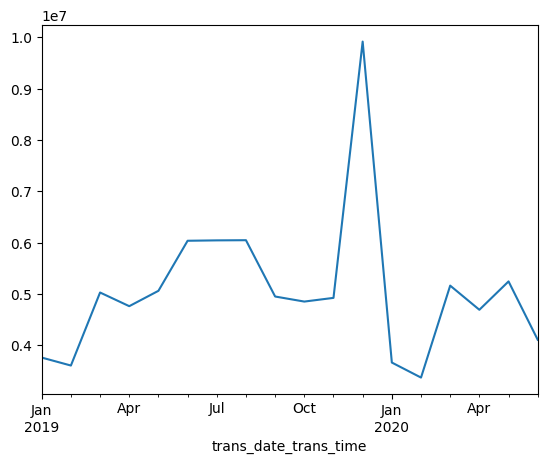

In [16]:
df.resample('ME', on='trans_date_trans_time')['amt'].sum().plot()

### 4.1.3 3. What are the peak spending hours in a day?

<Axes: xlabel='Hour'>

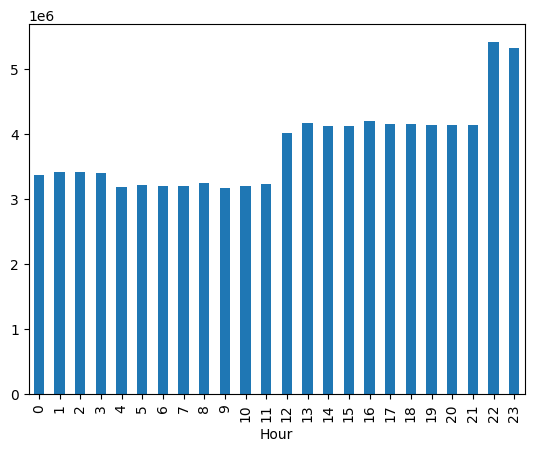

In [17]:
df['Hour'] = df['trans_date_trans_time'].dt.hour
df.groupby('Hour')['amt'].sum().plot(kind='bar')

### 4.1.4 What is the most common payment method used? 

In [18]:
# Information not available in the DataSet

### 4.1.5 Which merchants have the highest transactions?

In [19]:
df.groupby('merchant')['amt'].sum().sort_values(ascending=False)

merchant
fraud_Kilback LLC                     391078.15
fraud_Bradtke PLC                     302481.25
fraud_Doyle Ltd                       300971.37
fraud_Hackett-Lueilwitz               300208.14
fraud_Schumm, Bauch and Ondricka      299115.14
                                        ...    
fraud_Pfeffer LLC                      46484.86
fraud_Ortiz Group                      46451.33
fraud_Trantow PLC                      46397.34
fraud_Kohler, Lindgren and Koelpin     44704.41
fraud_Bahringer-Larson                 44227.23
Name: amt, Length: 693, dtype: float64

## Intermediate EDA Questions

### 4.2.1 Are there seasonal trends in spending across different categories?

<Axes: xlabel='trans_date_trans_time'>

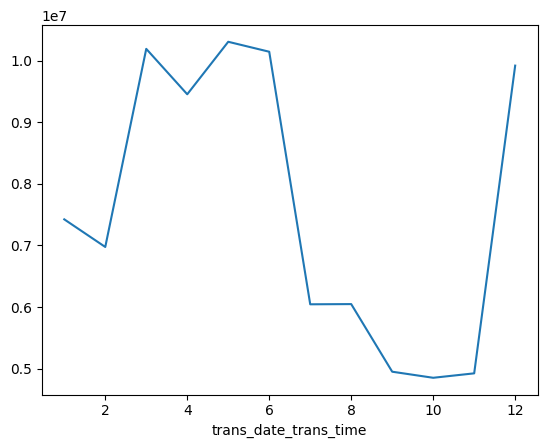

In [20]:
df.groupby(df['trans_date_trans_time'].dt.month)['amt'].sum().plot()

### 4.2.2 How do different customer segments (high spenders vs. low spenders) behave?

In [21]:
df.groupby('Customer_ID')['amt'].sum().describe().round(2)

count       983.00
mean      92800.03
std       59584.78
min        1348.53
25%       43554.99
50%       88514.24
75%      126784.21
max      296436.73
Name: amt, dtype: float64

### 4.2.3 What is the distribution of transaction amounts (e.g., histogram, boxplot analysis)? 

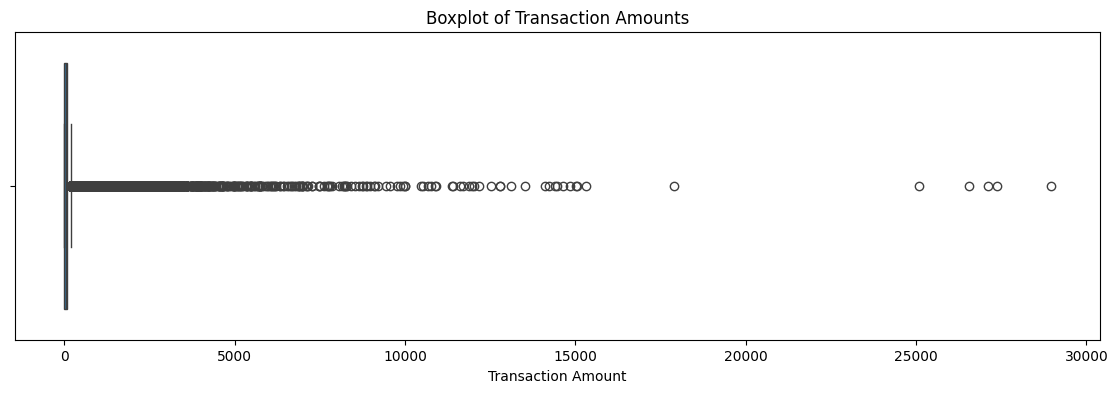

In [22]:
plt.figure(figsize=(14,4))
sns.boxplot(x=df['amt'])
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amounts')
plt.show()

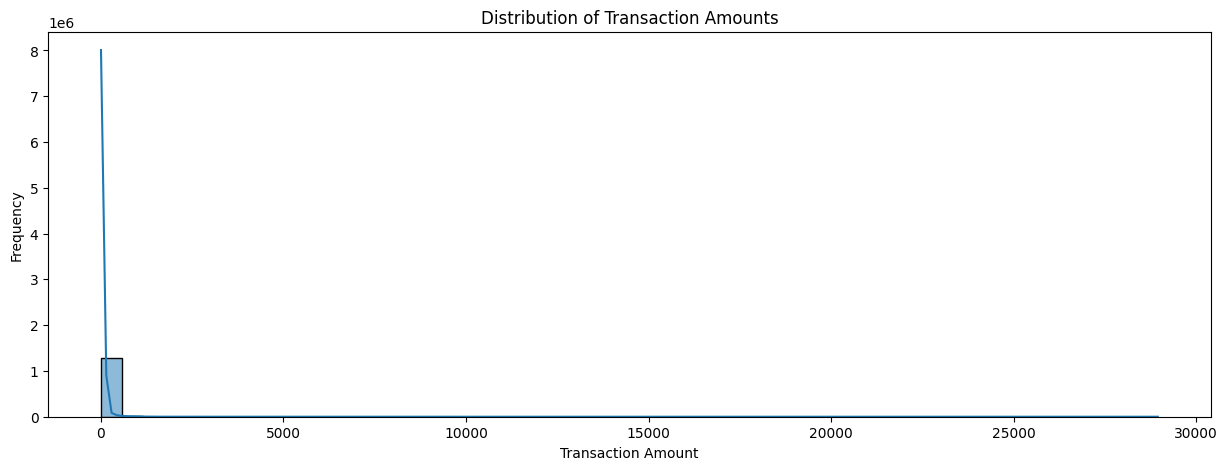

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(df['amt'], bins=50, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

In [24]:
df['amt'].describe().round(2)

count    1296675.00
mean          70.35
std          160.32
min            1.00
25%            9.65
50%           47.52
75%           83.14
max        28948.90
Name: amt, dtype: float64

### 4.2.4 Are there any correlations between spending behavior and location?

In [25]:
df_city_spending = df.groupby('city')[['amt', 'city_pop']].sum()
df_city_spending = df_city_spending.sort_values('amt', ascending=False)

print(df_city_spending.head(10))

# Big cities does'nt always spend more

                    amt     city_pop
city                                
Meridian      439979.08    216568400
Houston       375265.49  12115125600
Brandon       372015.50    135448432
Phoenix       358727.38   6663079150
Utica         350205.31      2654970
Indianapolis  343176.69   3707032804
Birmingham    333536.98   1269815484
Burbank       326395.76     10222725
Philadelphia  323846.45   5367666502
San Antonio   322992.36   8186438610


### 4.2.5 How does spending behavior change before and after payday? 

In [26]:
df['Day'] = df['trans_date_trans_time'].dt.day
print(f'Last Week spending (before Pay day): {df[df['Day'] > 23]['amt'].mean().round(2)}\nFirst Week spending (after Pay day): {df[df['Day'] < 7]['amt'].mean().round(2)}')

Last Week spending (before Pay day): 70.26
First Week spending (after Pay day): 69.73


## Advacned EDA Questions

### 4.3.1 Can we detect outliers in spending behavior using anomaly detection?

In [27]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
df['Anomaly'] = model.fit_predict(df[['amt']])

df['Anomaly'].value_counts()

Anomaly
 1    1283730
-1      12945
Name: count, dtype: int64

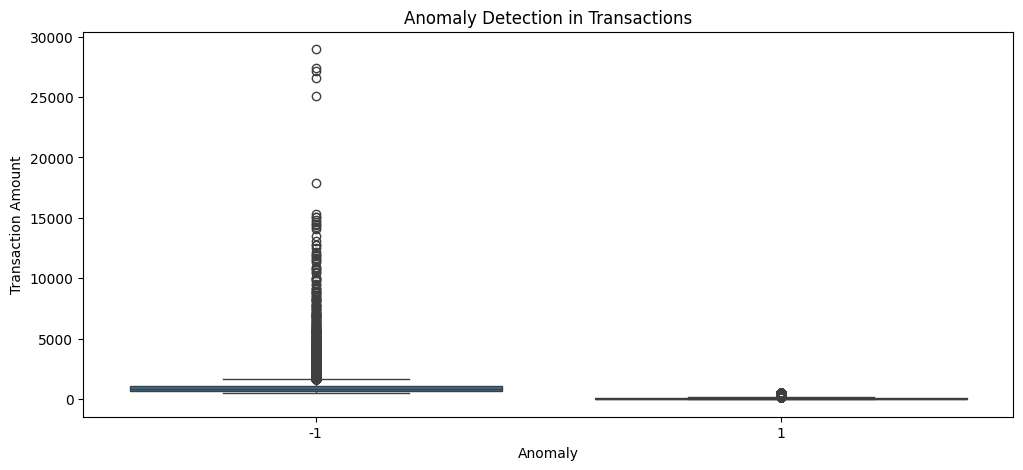

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['Anomaly'], y=df['amt'])
plt.xlabel('Anomaly')
plt.ylabel('Transaction Amount')
plt.title('Anomaly Detection in Transactions')
plt.show()

In [29]:
df_outliers = df[df['Anomaly'] == -1]
print(df_outliers[['trans_date_trans_time', 'amt', 'category', 'merchant']])

        trans_date_trans_time      amt      category  \
138       2019-01-01 01:41:22   636.41  shopping_pos   
232       2019-01-01 02:54:10  1055.47  shopping_net   
296       2019-01-01 03:51:28   909.66  shopping_net   
511       2019-01-01 06:43:54  1636.87      misc_net   
723       2019-01-01 09:23:55  1047.52      misc_net   
...                       ...      ...           ...   
1296014   2020-06-21 06:21:46   928.15      misc_net   
1296211   2020-06-21 08:05:27   658.98      misc_net   
1296228   2020-06-21 08:10:12   645.13      misc_pos   
1296482   2020-06-21 10:33:36   571.71      misc_net   
1296547   2020-06-21 11:07:51   754.81      misc_net   

                                        merchant  
138         fraud_Baumbach, Hodkiewicz and Walsh  
232                           fraud_Kassulke PLC  
296                          fraud_Heathcote LLC  
511                      fraud_McGlynn-Heathcote  
723                   fraud_Rippin, Kub and Mann  
...                  

### 4.3.2 Are there clusters of customers based on spending habits? (Use K-Means, DBSCAN)?

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df_cluster = df.groupby('cc_num').agg(
    Total_Spending=('amt', 'sum'),
    Avg_Transaction=('amt', 'mean'),
    Transaction_Frequency=('amt', 'count')
).reset_index()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[['Total_Spending', 'Avg_Transaction', 'Transaction_Frequency']])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)
print(df_cluster.head())

        cc_num  Total_Spending  Avg_Transaction  Transaction_Frequency  \
0  60416207185        85043.47        56.023366                   1518   
1  60422928733       105640.20        69.000784                   1531   
2  60423098130        58673.63       115.046333                    510   
3  60427851591        59129.61       111.987898                    528   
4  60487002085        25160.11        50.726028                    496   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


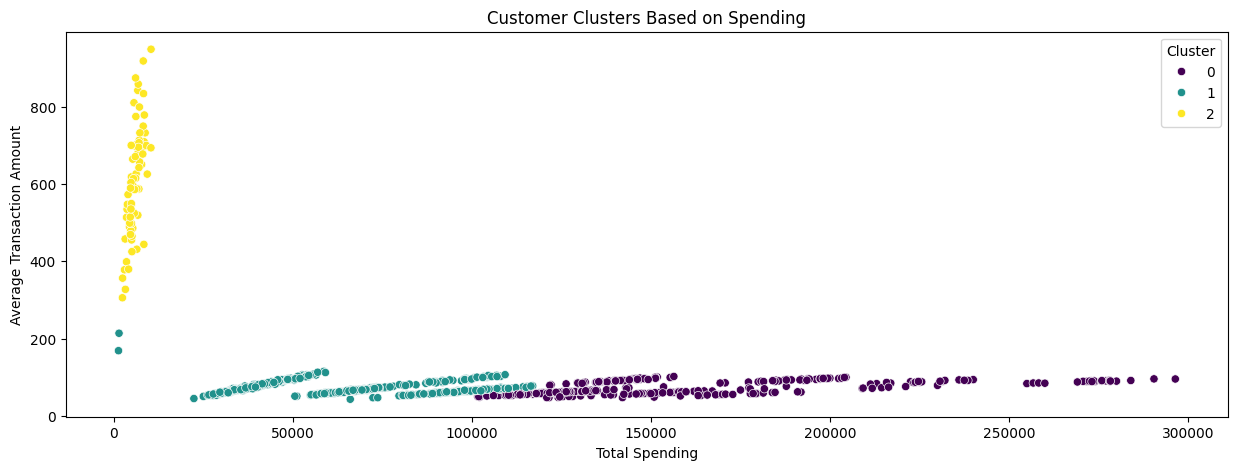

In [31]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df_cluster, x='Total_Spending', y='Avg_Transaction', hue='Cluster', palette='viridis')
plt.title("Customer Clusters Based on Spending")
plt.xlabel("Total Spending")
plt.ylabel("Average Transaction Amount")
plt.show()

In [32]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_cluster['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
print(df_cluster['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
0    983
Name: count, dtype: int64


### 4.3.3 Can we use association rule mining (Apriori, FP-Growth) to find patterns in purchases?

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
basket = df.groupby('trans_num')['category'].apply(list)
te = TransactionEncoder()
basket_encoded = te.fit_transform(basket)
df_encoded = pd.DataFrame(basket_encoded, columns=te.columns_)
print(df_encoded.head())

   entertainment  food_dining  gas_transport  grocery_net  grocery_pos  \
0          False        False          False        False        False   
1          False        False          False        False         True   
2          False         True          False        False        False   
3          False        False          False        False        False   
4          False        False          False        False         True   

   health_fitness   home  kids_pets  misc_net  misc_pos  personal_care  \
0           False  False      False     False     False           True   
1           False  False      False     False     False          False   
2           False  False      False     False     False          False   
3           False  False      False     False     False          False   
4           False  False      False     False     False          False   

   shopping_net  shopping_pos  travel  
0         False         False   False  
1         False         False 

In [34]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [35]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.6)
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


### 4.3.4 How does spending behavior correlate with economic factors (e.g., inflation, interest rates)?

In [36]:
# Information not available in the DataSet

### 4.3.5 Can we use NLP on transaction descriptions to classify transactions more effectively? 

In [37]:
# There's no description available so the best I could do it is to use the merchant column

import re
df['merchant_clean'] = (
    df['merchant']
    .str.lower()
    .str.strip()
    .apply(lambda x: re.sub(r'[^\w\s]', '', x))
)
print(df[['merchant', 'merchant_clean']].head())

                             merchant                     merchant_clean
0          fraud_Rippin, Kub and Mann          fraud_rippin kub and mann
1     fraud_Heller, Gutmann and Zieme     fraud_heller gutmann and zieme
2                fraud_Lind-Buckridge                fraud_lindbuckridge
3  fraud_Kutch, Hermiston and Farrell  fraud_kutch hermiston and farrell
4                 fraud_Keeling-Crist                 fraud_keelingcrist


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['merchant_clean'] = df['merchant'].str.lower().str.strip().apply(lambda x: re.sub(r'[^\w\s]', '', x))
tfidf = TfidfVectorizer(max_features=100)
merchant_tfidf = tfidf.fit_transform(df['merchant_clean'])

from sklearn.cluster import KMeans
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['merchant_cluster'] = kmeans.fit_predict(merchant_tfidf)
print(df['merchant_cluster'].value_counts())

merchant_cluster
1    921462
4    114641
2     97780
0     91939
3     70853
Name: count, dtype: int64


In [39]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    top_merchants = df[df['merchant_cluster'] == i]['merchant'].value_counts().head(10)
    print(top_merchants)
    print("\n")

Cluster 0:
merchant
fraud_Kling Inc       2687
fraud_Schmitt Inc     2651
fraud_Emard Inc       2641
fraud_Bernhard Inc    2639
fraud_Sporer Inc      2593
fraud_Harris Inc      2562
fraud_Marks Inc       2557
fraud_Medhurst Inc    2556
fraud_Harber Inc      2515
fraud_Kunze Inc       2458
Name: count, dtype: int64


Cluster 1:
merchant
fraud_Schumm PLC                        3634
fraud_Boyer PLC                         3493
fraud_Cummerata-Jones                   2736
fraud_Stroman, Hudson and Erdman        2721
fraud_Rodriguez Group                   2716
fraud_Jenkins, Hauck and Friesen        2705
fraud_Erdman-Kertzmann                  2705
fraud_Connelly, Reichert and Fritsch    2684
fraud_Friesen-Stamm                     2680
fraud_Prohaska-Murray                   2679
Name: count, dtype: int64


Cluster 2:
merchant
fraud_Kilback LLC      4403
fraud_Cormier LLC      3649
fraud_Kuhn LLC         3510
fraud_Kutch LLC        2734
fraud_Berge LLC        2677
fraud_Cummings LLC     2

## Training Forecasting Models

In [40]:
df_prophet = df.groupby(df['trans_date_trans_time'].dt.date)['amt'].sum().reset_index()
df_prophet.columns = ['ds', 'y']

from prophet import Prophet

model = Prophet(
    yearly_seasonality=True, 
    weekly_seasonality=False,  
    daily_seasonality=False
)

model.fit(df_prophet)

c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\holidays\deprecations\v1_incompatibility.py:40: FutureIncompatibilityWarning: 

This is a future version incompatibility warning from Holidays v0.66
to inform you about an upcoming change in our API versioning strategy that may affect your
project's dependencies. Starting from version 1.0 onwards, we will be following a loose form of
Semantic Versioning (SemVer, https://semver.org) to provide clearer communication regarding any
potential breaking changes.

This means that while we strive to maintain backward compatibility, there might be occasional
updates that introduce breaking changes to our API. To ensure the stability of your projects,
we highly recommend pinning the version of our API that you rely on. You can pin your current
holidays v0.x dependency (e.g., holidays==0.66) or limit it (e.g., holidays<1.0) in order to
avoid potentially unwanted upgrade to the version 1.0 when it's released (ETA 2025Q1-Q2).



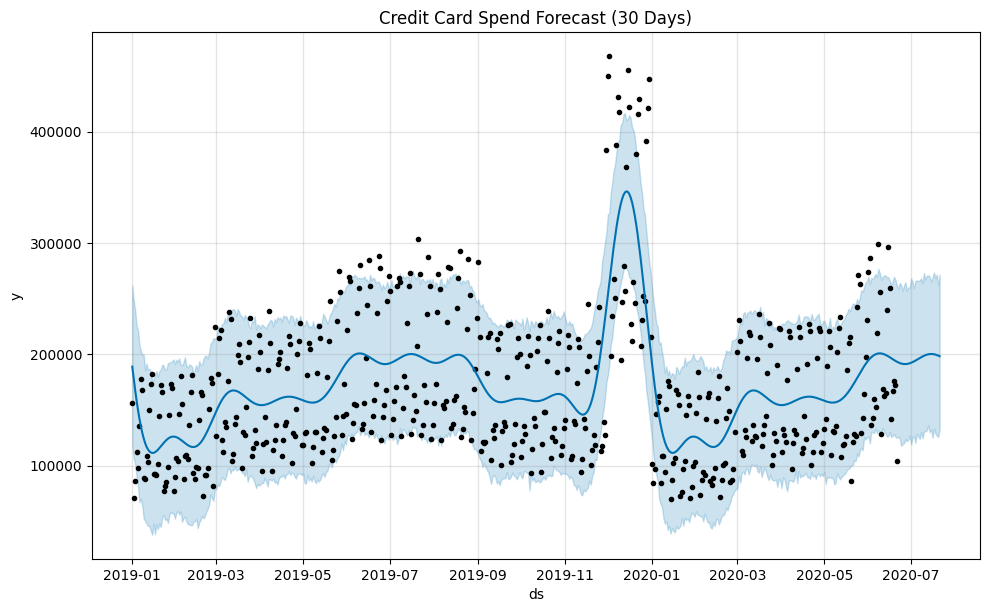

In [41]:
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)

model.plot(forecast)
plt.title("Credit Card Spend Forecast (30 Days)")
plt.show()

In [42]:
import joblib
joblib.dump(model, 'prophet_model.pkl')
model = joblib.load('prophet_model.pkl')

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

actual = df_prophet['y'][-30:]
predicted = forecast['yhat'][-30:]

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 53150.07
Root Mean Squared Error (RMSE): 58448.79


## StreamLit Deployment

In [44]:
# Orignally all of this code below will be stored in a seperate file called 'app.py', but for the sake of simplicity and submission, we will store it in the same file as the main code.

import streamlit as st
import pandas as pd
import joblib
from prophet import Prophet
import plotly.express as px

df1 = pd.read_csv("cleaned_data.csv")

model = joblib.load("prophet_model.pkl")

st.title("Credit Card Spend Forecasting")

customer_id = st.selectbox("Select Customer ID", df1["Customer_ID"].unique())
category = st.selectbox("Select Spending Category", df1["category"].unique())
time_range = st.slider("Select Forecasting Period (days)", 30, 180, 90)

customer_data = df1[(df1["Customer_ID"] == customer_id) & (df1["category"] == category)]
customer_data = customer_data.groupby("trans_date_trans_time")["amt"].sum().reset_index()

future = model.make_future_dataframe(periods=time_range, freq="D")
forecast = model.predict(future)

fig = px.line(forecast, x="ds", y="yhat", title="Spending Forecast")
st.plotly_chart(fig)

st.write("Forecasted spending trends for the selected customer and category.")

2025-02-19 04:11:28.998 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 04:11:29.278 
  command:

    streamlit run C:\Users\arsal\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-19 04:11:29.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 04:11:29.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 04:11:29.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 04:11:29.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 04:11:29.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 04:11:29.298 Sess